In [102]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load datasets
neg_clicked = pd.read_csv('neg_click.csv')
pos_clicked = pd.read_csv('pos_click.csv')

# Add a target column to each dataset
neg_clicked['clicked'] = 0
pos_clicked['clicked'] = 1

# Combine the datasets
sampled_df = pd.concat([neg_clicked, pos_clicked], ignore_index=True)



sampled_df.drop(['clicked_1'], axis= 1, inplace= True  )

# Separate features and target
X = sampled_df.drop(columns=['clicked'])
y = sampled_df['clicked'].astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


,label_x_1,age_1,gender_1,residence_1,city_1,city_rank_1,series_group_1,emui_dev_1,net_type_1,creat_type_cd_1,...,e_ch_1,e_m_1,e_po_1,e_rn_1,e_section_1,label_y_1,cillabel_1,pro_1,clicked_1,clicked
0,0.0,5,2,46,354,2,8,32,7,2,...,0,0,0,0,0,0.0,0,0,False,0
1,0.0,5,2,46,354,2,8,32,7,8,...,0,0,0,0,0,0.0,0,0,False,0
2,0.0,5,2,46,354,2,8,32,7,8,...,0,0,0,0,0,0.0,0,0,False,0
3,0.0,5,2,46,354,2,8,32,7,2,...,0,0,0,0,0,0.0,0,0,False,0
4,0.0,0,0,0,0,0,0,0,0,0,...,19,1087,7,1,1,-1.0,-1,0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743030,0.0,3,2,41,135,5,7,21,7,10,...,11,196,1,1,0,-1.0,-1,0,True,1
743031,0.0,3,2,41,135,5,7,21,7,8,...,11,196,1,1,0,-1.0,-1,0,True,1
743032,1.0,3,2,41,135,5,7,21,7,3,...,11,196,1,1,0,-1.0,-1,0,True,1
743033,0.0,3,2,41,135,5,7,21,7,10,...,11,196,1,1,0,-1.0,-1,0,True,1


In [103]:
rf = RandomForestRegressor(max_depth= 2, random_state=100)
rf. fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [104]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

In [105]:
from sklearn.metrics import mean_squared_error, r2_score
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [106]:
rf_results = pd.DataFrame({
    'method': ['random forest'],
    'training mse': [rf_train_mse],
    'training R2': [rf_train_r2],
    'test MSE': [rf_test_mse],
    'Test R2': [rf_test_r2]
})
rf_results.columns = ['method', 'training mse', 'training R2', 'test MSE', 'Test R2']

In [107]:
rf_results

,method,training mse,training R2,test MSE,Test R2
0,random forest,0.002371,0.975235,0.002257,0.976426


AttributeError: module 'matplotlib' has no attribute 'title'

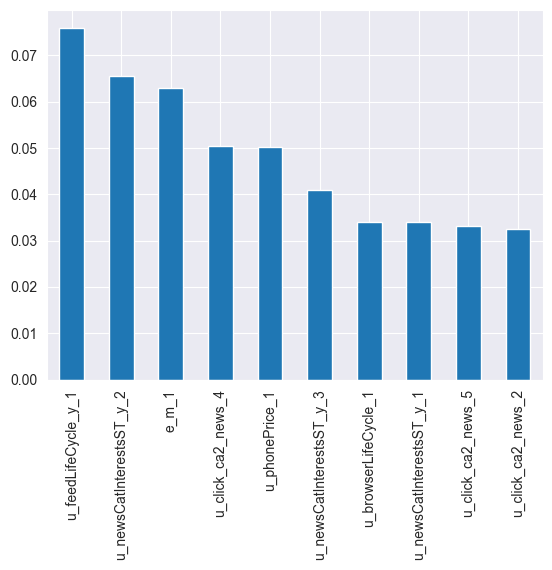

In [108]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib as plt
#train a classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)



# Determine feature importance
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
feature_importances.head(10).plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()